# FakeNews

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Importar la data

In [2]:
#Leer la data
df=pd.read_csv('data/news.csv')
#Obtener la forma del DataFrame y el head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Obtener las etiquetas
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
#Dividir el dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

## TfidfVectorizer

In [5]:
#Inicilalizar TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Ajustar y transformar el conjunto de entrenamiento, transformar el conjunto de prueba
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [6]:
#Inicializa el PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predecir en el conjunto de prueba y calcular la precisión
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.58%


In [7]:
#Matriz de confusion
cm  = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[588,  50],
       [ 44, 585]])

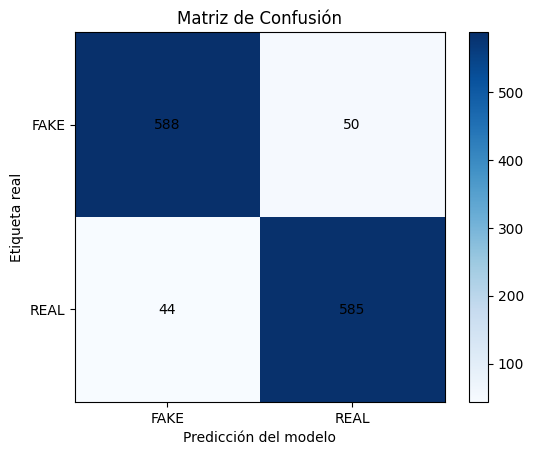

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear plano de matriz de confusión
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['FAKE', 'REAL'])
plt.yticks(tick_marks, ['FAKE', 'REAL'])
plt.xlabel('Predicción del modelo')
plt.ylabel('Etiqueta real')

# Agregar anotaciones en los bloques de la matriz
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')

plt.show()

## Probemos algunas noticias de USA...

In [12]:
# Obtener la entrada del usuario
input_text = input("Ingresa la noticia para clasificar: ")

# Transformar la entrada del usuario en características TF-IDF
tfidf_input = tfidf_vectorizer.transform([input_text])

# Hacer la predicción
prediction = pac.predict(tfidf_input)

# Mostrar la predicción al usuario
print("La predicción es:", prediction[0])

Ingresa la noticia para clasificar: Former US President Donald Trump has said court officials "were crying" as he was indicted last week on business fraud charges, in his first interview since the historic arraignment.  Speaking to Fox News, Mr Trump said many of the staff at the Manhattan court "were in tears or close to it".  The 2024 White House contender vowed that even if convicted, "I'd never drop out, it's not my thing".  Last week he pleaded not guilty to 34 counts of falsifying business records.  In the interview aired on Tuesday on the Tucker Carlson Tonight show, Mr Trump described how he was processed at the criminal court by officials, including police. He said "tears were pouring down their eyes".  "They were incredible," he said of the staff. "When I went to the courthouse, which is also a prison in a sense, they signed me in and I'll tell you people were crying.  "People that work there. Professionally work there that have no problems putting in murderers and they see e

In [ ]:
# Obtener la entrada del usuario
input_text = input("Ingresa la noticia para clasificar: ")

# Transformar la entrada del usuario en características TF-IDF
tfidf_input = tfidf_vectorizer.transform([input_text])

# Hacer la predicción
prediction = pac.predict(tfidf_input)

# Mostrar la predicción al usuario
print("La predicción es:", prediction[0])